Here we will compute the price of the call option in more sophisticated way

In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2011-1-1', end='2021-3-8')['Adj Close']

In [10]:
log_returns = np.log(1 + data.pct_change())

Calculate future prices. It's another version of Brownian motion and is called an Euler Discretization.
$$
S_t= S_{t-1}* e^{((r- \frac{1}{2} {stdev}^2)\delta_t+ {stdev}\sqrt{\delta_t}Z_t)}
$$
where $S_t$ - stock price at day $t$, $S_{t-1}$ - stock price at previous day, r - risk-free rate, ${stdev}$ - is a standard deviation of log return, $\delta_t$ - fixed time interval, $Z_t$ - random component.


In [11]:
r = 0.025
stdev = (log_returns.std() * 250 ** 0.5).values
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

In [12]:
iterations = 10000
Z = np.random.standard_normal((t_intervals + 1, iterations))

S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0 

In [13]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t \
                           + stdev * delta_t ** 0.5 * Z[t])

In [15]:
S.shape

(251, 10000)

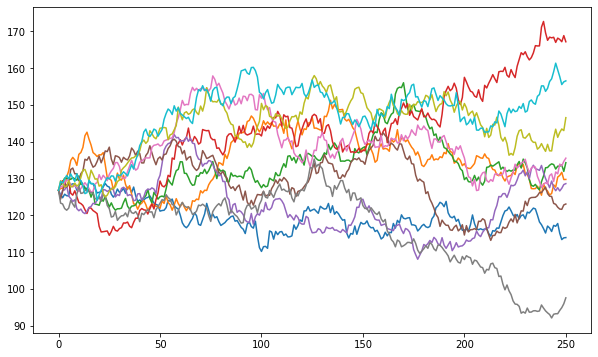

In [17]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

In [24]:
# payoff
p = np.maximum(S[-1] - 110, 0)

In [25]:
p.shape

(10000,)

The formula to discount the average of this payoff:

$$C= \frac{e^{-rT}*\sum{p_i}}{iterations}$$

In [27]:
# price of the call option
C = np.exp(-r * T) * np.sum(p) / iterations
C

21.46337546167117